# Animation with netCDF data 

In [1]:
import  netCDF4 
import  matplotlib
import  matplotlib.pyplot as plt
from    matplotlib import colors as c
import  matplotlib.animation as animation
from    mpl_toolkits.basemap import Basemap, shiftgrid
import  numpy as np
import  wget
from    pathlib import Path
import  os
from    datetime   import datetime
from    IPython.display import HTML
from    IPython.display import Video
from    matplotlib import rc
import  ffmpeg
 
matplotlib.use("Agg")
%matplotlib inline

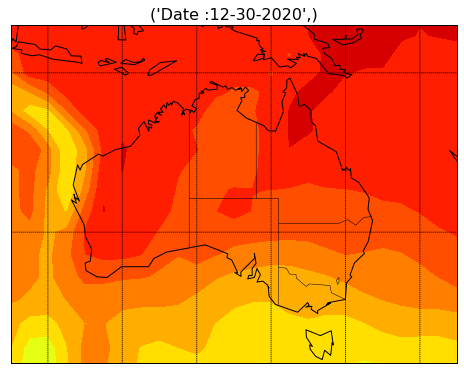

In [2]:
# Download netCDF file and read data
filename = 'air.sig995.2020.nc'
download_path = str(Path.home() / "Downloads")
url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/surface/' + filename

if not os.path.exists(download_path+ '\\' + filename):
    print("Downloading to the folder:", download_path)
    download_file  = wget.download(url, out=download_path)
    print("\nDownload complete")   

dataset = netCDF4.Dataset(download_path+ '\\' + filename)
lats = dataset.variables ['lat'][:]
lons = dataset.variables ['lon'][:]

avg_air_temp  = dataset.variables ['air']
air_temp_c    = avg_air_temp[:] - 273.15
temp            = air_temp_c[0, : , :]

dataset.close()

# Create animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

matplotlib.rcParams['animation.embed_limit'] = 2**128

fig  = plt.figure (figsize = (8, 8))
ax   = fig.add_subplot (1,1,1)

def create_map (i, ax, map, x, y, temp):
  
    day_num = str(i+1)
    day_num.rjust(3 + len(str(day_num)), '0')
    year = "2020"
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")    
    title = "Date :"+ str(res) ,
    
    ax.set_title (title, fontsize = 16)
    
    map.drawcoastlines()
    map.drawparallels (np.arange (-90.0, 91.0, 20.0))
    map.drawmeridians (np.arange (-180.0, 181.0, 10.0 ))
    #map.drawmeridians (np.arange (-180.0, 181.0, 10.0 ))
    map.drawmapboundary (fill_color='white')
    map.drawstates()
 
    contour = map.contourf (x, y, temp, 20,  cmap = plt.cm.get_cmap ('jet'))
    #return contour

def netCDF_animate (i, ax, map, x, y, temp):
    ax.clear()
    temp = air_temp_c[i, : , :]
    new_contour= create_map (i, ax, map, x, y, temp)
    # return new_contour

map = Basemap (projection='merc', 
               llcrnrlat = -44,  urcrnrlat = -3.65, 
               llcrnrlon = 105,  urcrnrlon = 165,
               resolution = 'c',
               ax = ax)

#shift lons from the range -180 to 180 fron the range 0 to 360
temp, lons = shiftgrid (180.0, temp, lons, start=False)
llons, llats = np.meshgrid(lons, lats)
x, y = map (llons, llats)

anim = animation.FuncAnimation (fig, netCDF_animate, 
                               fargs = (ax, map, x, y, temp),
                               interval = 50,
                               frames= np.arange(0, 365),
                               repeat=True, blit=False)

FFMpegWriter = animation.writers['ffmpeg']
#anim.save("netCDF_anim.mp4")
#HTML(anim.to_html5_video())
rc('animation', html='html5')
anim

# REF: 
# Animation in Jupyter Notebooks
# https://jckantor.github.io/CBE30338/A.03-Animation-in-Jupyter-Notebooks.html

## Interactive netCDF plot

In [3]:
from ipywidgets import interact
from datetime   import datetime

In [4]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
#%matplotlib ipympl

filename = 'air.sig995.2020.nc'
download_path = str(Path.home() / "Downloads")
url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis/surface/' + filename

if not os.path.exists(download_path+ '\\' + filename):
    print("Downloading to the folder:", download_path)
    download_file  = wget.download(url, out=download_path)
    print("\nDownload complete")   

ax = None

def create_map (i, llons, llats, temp):
    
    fig = plt.figure (figsize = [12,15])
    
    ax  = fig.add_subplot (1,1,1)
  
    map = Basemap (projection='merc', resolution = 'c',  ax = ax,
                   #llcrnrlat=38, urcrnrlat=76, 
                   #llcrnrlon = -65, urcrnrlon = 30 
                   llcrnrlat =-44,  urcrnrlat = -3.65, 
                   llcrnrlon =105, urcrnrlon = 165
                  )
   
    day_num = str(i)
    day_num.rjust(3 + len(str(day_num)), '0')
    year = "2020"
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")    
    title = "Date :"+ str(res) ,
    
    ax.set_title (title, fontsize = 14) 
    
    map.drawcoastlines()
    #map.fillcontinents (fill_color='white') #(color = '#ffe2ab')
    map.drawparallels (np.arange (-90.0, 91.0, 20.0))
    map.drawmeridians (np.arange (-180.0, 181.0, 10.0 ))
    map.drawmapboundary (fill_color='white')
    map.drawstates()
    
    x, y = map (llons, llats)

    contour = map.contourf (x, y, temp, 20, cmap = plt.cm.get_cmap ('jet'))
    return contour 

def netCDF_animate (i, llons, llats, temp):
    #ax.clear()
 
    temp = air_temp_c[i-1, : , :]
    print("Daily Temp, Min:", temp.min(), "Max:", temp.max())
 
    new_contour =  create_map (i, llons, llats, temp)
    return new_contour

dataset = netCDF4.Dataset(download_path+ '\\' + filename)
lats = dataset.variables ['lat'][:]
lons = dataset.variables ['lon'][:]
avg_air_temp  = dataset.variables ['air']
air_temp_c    = avg_air_temp[:] - 273.15
temp            = air_temp_c[0, : , :]

#shift lons from the range -180 to 180 fron the range 0 to 360
temp, lons = shiftgrid (180.0, temp, lons, start=False)
llons, llats = np.meshgrid(lons, lats)
dataset.close()
 
@interact ( Day = (1, 366), continuous_update=False)
def finteract (Day):
    ca = netCDF_animate (Day, llons, llats, temp)

interactive(children=(IntSlider(value=183, description='Day', max=366, min=1), Output()), _dom_classes=('widge…